In [47]:
import networkx as nx
import gzip
import matplotlib.pyplot as plt
from numpy import genfromtxt
import pandas as pd
import numpy as np
import random


In [48]:
mydata = genfromtxt('COCAINE_ACERO - COCAINE_ACERO (1).csv', delimiter=',')

In [49]:
adjacency = mydata[1:,1:]

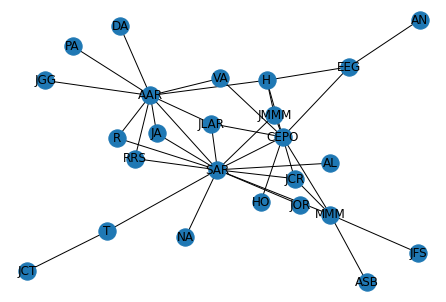

In [50]:
input_data = pd.read_csv('COCAINE_ACERO.csv', index_col=0)
label_list=list(input_data.columns.values)
G = nx.Graph(input_data.values)
labeldict=dict(enumerate(label_list))
nx.draw(G,labels=labeldict,with_labels= True)


In [51]:
outer_loop = []
for i in range(len(adjacency)):
    inner_loop = []
    for j in range(len(adjacency)):
        if adjacency[i][j] == 1:
            inner_loop.append(int(j))
    outer_loop.append(inner_loop)
    print(inner_loop)
V = len(adjacency)
print("Total Number of Nodes:",V)
print(outer_loop)

[5, 7, 9, 13, 14, 19, 20, 21, 22, 24]
[22]
[6]
[17]
[6, 7, 8, 10, 14, 15, 17, 22, 24]
[0]
[2, 4, 7]
[0, 4, 6, 15]
[4]
[0, 22]
[4, 17, 22]
[3]
[17]
[0]
[0, 4, 22]
[4, 7, 22]
[22]
[3, 4, 10, 12, 22]
[22]
[0]
[0, 22]
[0, 22]
[0, 1, 4, 9, 14, 15, 16, 17, 18, 21, 23]
[11, 22]
[0, 4]
Total Number of Nodes: 25
[[5, 7, 9, 13, 14, 19, 20, 21, 22, 24], [22], [6], [17], [6, 7, 8, 10, 14, 15, 17, 22, 24], [0], [2, 4, 7], [0, 4, 6, 15], [4], [0, 22], [4, 17, 22], [3], [17], [0], [0, 4, 22], [4, 7, 22], [22], [3, 4, 10, 12, 22], [22], [0], [0, 22], [0, 22], [0, 1, 4, 9, 14, 15, 16, 17, 18, 21, 23], [11, 22], [0, 4]]


In [52]:
result = [-1] * V
def greedyColoring(adj, V):
     
    
 
    
    result[0] = 0;
 
 
    available = [False] * V
 
   
    for u in range(1, V):
         
        for i in adj[u]:
            if (result[i] != -1):
                available[result[i]] = True

        cr = 0
        while cr < V:
            if (available[cr] == False):
                break
             
            cr += 1
             
       
        result[u] = cr
 
        for i in adj[u]:
            if (result[i] != -1):
                available[result[i]] = False
 
    

In [53]:
greedyColoring(outer_loop,V)

In [54]:
nc=max(result)+1
color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(nc)]
print(result)
colormap=[]

[0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 1, 1, 3, 0, 1]


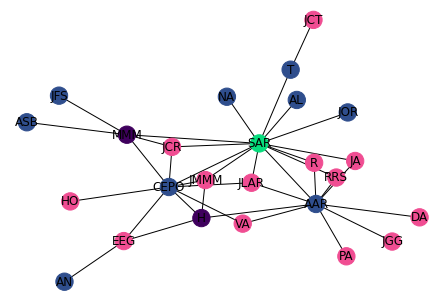

In [55]:
for i in range(len(result)):
    k=result[i]
    if k<nc:
        colormap.append(color[k])
#nx.draw(G, node_color=colormap, with_labels=True)
nx.draw(G,node_color=colormap,labels=labeldict,with_labels= True)
plt.show()

In [56]:
frequency = {}


for item in result:
   
   if item in frequency:
      
      frequency[item] += 1
   else:
      frequency[item] = 1

max_key = max(frequency, key=frequency.get)
n=frequency[max_key]
resource=((V-n)/V)*100
print("Total Number of Nodes :",V)
print("Number of Nodes to be Monitored :",n)
print("Reduction in resources : ",resource,"%")


Total Number of Nodes : 25
Number of Nodes to be Monitored : 13
Reduction in resources :  48.0 %


In [57]:
centrality={}
for i in range(len(outer_loop)):
    l=len(outer_loop[i])
    centrality[label_list[i]]=l


In [58]:
print("Heirarchy with Centrality")
sorted_dict = {}
sorted_keys = sorted(centrality, key=centrality.get)  

for w in sorted_keys:
    sorted_dict[w] = centrality[w]


res = dict(reversed(list(sorted_dict.items())))
print(res)

Heirarchy with Centrality
{'SAR': 11, 'AAR': 10, 'CEPO': 9, 'MMM': 5, 'H': 4, 'JMMM': 3, 'JLAR': 3, 'JCR': 3, 'EEG': 3, 'VA': 2, 'T': 2, 'RRS': 2, 'R': 2, 'JA': 2, 'PA': 1, 'NA': 1, 'JOR': 1, 'JGG': 1, 'JFS': 1, 'JCT': 1, 'HO': 1, 'DA': 1, 'ASB': 1, 'AN': 1, 'AL': 1}
